# Electronics Store Purchase History Project

## 1. Introduction

## 1.1 Importing and Inspecting the Data

My first task is importing and inspecting the data. I need to see if cleaning is necessary.

In [1]:
import pandas as pd

estore_data = pd.read_csv("kz.csv")

In [2]:
estore_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


When inspecting the first 5 rows of the data, there are no immediate issues that present. This is however not the case in general so more in depth examination is require.

In [3]:
estore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


Here, I can see the data set consists of 8 variables with 2.6+ million observations. The columns are a mix of `object`, `int64` and `float64` data types. The event_time column particularly of note. It is structured as a date-time. I would like to expand this column so that I can do temporal analysis on sales. The first step is to remove `UTC` from the string.

In [4]:
estore_data.event_time = estore_data.event_time.str.replace(" UTC", '')
estore_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


I will now store the date and time portions in seperate columns, then expand those further into individual columns. This will allow me to track sales by each aspect of the date time variable.

In [5]:
estore_data[['date', 'time']] = estore_data.event_time.str.split(' ', expand = True)
estore_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24,19:16:21


In [6]:
estore_data[["year", "month", "day"]] = estore_data.date.str.split("-", expand = True)
estore_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,04,24
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,04,24
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,04,24
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,04,24
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24,19:16:21,2020,04,24


In [7]:
estore_data[['hour', 'minute', 'sec']] = estore_data.time.str.split(":", expand = True)
estore_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,04,24,11,50,39
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,04,24,11,50,39
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,04,24,14,37,43
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,04,24,14,37,43
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24,19:16:21,2020,04,24,19,16,21


In [8]:
estore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
 8   date           object 
 9   time           object 
 10  year           object 
 11  month          object 
 12  day            object 
 13  hour           object 
 14  minute         object 
 15  sec            object 
dtypes: float64(3), int64(2), object(11)
memory usage: 321.5+ MB


In [9]:
estore_data[['year', 'month', 'day', 'hour', 'minute', 'sec']] = estore_data[['year', 'month', 'day', 'hour', 'minute', 'sec']].astype('int64')
estore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
 8   date           object 
 9   time           object 
 10  year           int64  
 11  month          int64  
 12  day            int64  
 13  hour           int64  
 14  minute         int64  
 15  sec            int64  
dtypes: float64(3), int64(8), object(5)
memory usage: 321.5+ MB


I now have the `event_time` data the way I want it for my analysis.

In [10]:
estore_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,4,24,11,50,39
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,4,24,11,50,39
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,4,24,14,37,43
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,4,24,14,37,43
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24,19:16:21,2020,4,24,19,16,21


In [11]:
estore_data.describe(include = "all")

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
count,2633521,2.633521e+06,2.633521e+06,2.201567e+06,2021319,2127516,2.201567e+06,5.641690e+05,2633521,2633521,2.633521e+06,2.633521e+06,2.633521e+06,2.633521e+06,2.633521e+06,2.633521e+06
unique,1316174,NaN,NaN,NaN,510,23021,NaN,NaN,323,72303,NaN,NaN,NaN,NaN,NaN,NaN
top,1970-01-01 00:33:40,NaN,NaN,NaN,electronics.smartphone,samsung,NaN,NaN,2020-03-07,00:33:40,NaN,NaN,NaN,NaN,NaN,NaN
freq,19631,NaN,NaN,NaN,357682,358928,NaN,NaN,24407,19631,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.361783e+18,1.674080e+18,2.273827e+18,NaN,NaN,1.540932e+02,1.515916e+18,NaN,NaN,2.019627e+03,5.507858e+00,1.544749e+01,9.044651e+00,2.958847e+01,2.949336e+01
std,NaN,1.716538e+16,3.102249e+17,2.353247e+16,NaN,NaN,2.419421e+02,2.377083e+07,NaN,NaN,4.300789e+00,2.980577e+00,8.775137e+00,3.271600e+00,1.728805e+01,1.732217e+01
min,NaN,2.294360e+18,1.515966e+18,2.268105e+18,NaN,NaN,0.000000e+00,1.515916e+18,NaN,NaN,1.970000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2.348807e+18,1.515966e+18,2.268105e+18,NaN,NaN,1.456000e+01,1.515916e+18,NaN,NaN,2.020000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.500000e+01,1.400000e+01
50%,NaN,2.353254e+18,1.515966e+18,2.268105e+18,NaN,NaN,5.553000e+01,1.515916e+18,NaN,NaN,2.020000e+03,6.000000e+00,1.500000e+01,9.000000e+00,3.000000e+01,3.000000e+01
75%,NaN,2.383131e+18,1.515966e+18,2.268105e+18,NaN,NaN,1.967400e+02,1.515916e+18,NaN,NaN,2.020000e+03,8.000000e+00,2.300000e+01,1.100000e+01,4.400000e+01,4.400000e+01


It is quite obvious that there is a large amount of missing data in the `category_id`, `category_code`, `brand`, `price` and `user_id` columns. I will start by examining the data where `category_id` is missing.

In [12]:
estore_data[estore_data.category_id.isna()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
1812,2020-05-02 11:12:20,2300138854784434309,1515966223509353669,NaN,0.02,1515915625453675584,NaN,NaN,2020-05-02,11:12:20,2020,5,2,11,12,20
3633,2020-05-06 07:37:55,2302930038149874117,1515966223509128764,NaN,38.17,1515915625455624044,NaN,NaN,2020-05-06,07:37:55,2020,5,6,7,37,55
3918,2020-05-06 22:36:13,2303382163636093788,1515966223510204743,NaN,0.02,1515915625441101795,NaN,NaN,2020-05-06,22:36:13,2020,5,6,22,36,13
6015,2020-05-10 09:41:54,2305891548316827762,1515966223509353669,NaN,0.02,1515915625441980762,NaN,NaN,2020-05-10,09:41:54,2020,5,10,9,41,54
7802,2020-05-13 03:09:39,2307868447599493180,1515966223510600539,NaN,0.02,1515915625441293616,NaN,NaN,2020-05-13,03:09:39,2020,5,13,3,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56,2388440981134693047,2388434452476082043,NaN,16.18,1515915625514803713,NaN,NaN,2020-11-19,11:34:56,2020,11,19,11,34,56
2632434,2020-11-19 05:38:31,2388440981134693055,1515966223523303300,NaN,13.87,1515915625514803718,NaN,NaN,2020-11-19,05:38:31,2020,11,19,5,38,31
2632437,2020-11-19 11:21:22,2388440981134693056,1515966223523303302,NaN,57.87,1515915625514803719,NaN,NaN,2020-11-19,11:21:22,2020,11,19,11,21,22
2632472,2020-11-19 09:54:22,2388440981134693073,2388434452476685318,NaN,5.76,1515915625514155115,NaN,NaN,2020-11-19,09:54:22,2020,11,19,9,54,22


Looking at missing `category_id` data revealed that `category_code` and `brand` are incorrectly filled. Here, `category_code` and looks like `price` and `brand` looks like `user_id`. I will want to replace the `NaN` values in `price` and `user_id` with the corrected values from the relevant columns.

In [13]:
estore_data.price.fillna(estore_data.category_code, inplace = True)
estore_data[estore_data.category_id.isna()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
1812,2020-05-02 11:12:20,2300138854784434309,1515966223509353669,NaN,0.02,1515915625453675584,0.02,NaN,2020-05-02,11:12:20,2020,5,2,11,12,20
3633,2020-05-06 07:37:55,2302930038149874117,1515966223509128764,NaN,38.17,1515915625455624044,38.17,NaN,2020-05-06,07:37:55,2020,5,6,7,37,55
3918,2020-05-06 22:36:13,2303382163636093788,1515966223510204743,NaN,0.02,1515915625441101795,0.02,NaN,2020-05-06,22:36:13,2020,5,6,22,36,13
6015,2020-05-10 09:41:54,2305891548316827762,1515966223509353669,NaN,0.02,1515915625441980762,0.02,NaN,2020-05-10,09:41:54,2020,5,10,9,41,54
7802,2020-05-13 03:09:39,2307868447599493180,1515966223510600539,NaN,0.02,1515915625441293616,0.02,NaN,2020-05-13,03:09:39,2020,5,13,3,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56,2388440981134693047,2388434452476082043,NaN,16.18,1515915625514803713,16.18,NaN,2020-11-19,11:34:56,2020,11,19,11,34,56
2632434,2020-11-19 05:38:31,2388440981134693055,1515966223523303300,NaN,13.87,1515915625514803718,13.87,NaN,2020-11-19,05:38:31,2020,11,19,5,38,31
2632437,2020-11-19 11:21:22,2388440981134693056,1515966223523303302,NaN,57.87,1515915625514803719,57.87,NaN,2020-11-19,11:21:22,2020,11,19,11,21,22
2632472,2020-11-19 09:54:22,2388440981134693073,2388434452476685318,NaN,5.76,1515915625514155115,5.76,NaN,2020-11-19,09:54:22,2020,11,19,9,54,22


Now that I have corrected the `price` data, I can work on `category_code`. Here I will replace all values that could be floats with "unknown".

In [14]:
import numpy as np

def change_float_to_nan(value):
    try:
        float(value)
        return "unknown"
    except ValueError:
        return value

estore_data.category_code = estore_data.category_code.apply(change_float_to_nan)
estore_data[estore_data.category_id.isna()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
1812,2020-05-02 11:12:20,2300138854784434309,1515966223509353669,NaN,unknown,1515915625453675584,0.02,NaN,2020-05-02,11:12:20,2020,5,2,11,12,20
3633,2020-05-06 07:37:55,2302930038149874117,1515966223509128764,NaN,unknown,1515915625455624044,38.17,NaN,2020-05-06,07:37:55,2020,5,6,7,37,55
3918,2020-05-06 22:36:13,2303382163636093788,1515966223510204743,NaN,unknown,1515915625441101795,0.02,NaN,2020-05-06,22:36:13,2020,5,6,22,36,13
6015,2020-05-10 09:41:54,2305891548316827762,1515966223509353669,NaN,unknown,1515915625441980762,0.02,NaN,2020-05-10,09:41:54,2020,5,10,9,41,54
7802,2020-05-13 03:09:39,2307868447599493180,1515966223510600539,NaN,unknown,1515915625441293616,0.02,NaN,2020-05-13,03:09:39,2020,5,13,3,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56,2388440981134693047,2388434452476082043,NaN,unknown,1515915625514803713,16.18,NaN,2020-11-19,11:34:56,2020,11,19,11,34,56
2632434,2020-11-19 05:38:31,2388440981134693055,1515966223523303300,NaN,unknown,1515915625514803718,13.87,NaN,2020-11-19,05:38:31,2020,11,19,5,38,31
2632437,2020-11-19 11:21:22,2388440981134693056,1515966223523303302,NaN,unknown,1515915625514803719,57.87,NaN,2020-11-19,11:21:22,2020,11,19,11,21,22
2632472,2020-11-19 09:54:22,2388440981134693073,2388434452476685318,NaN,unknown,1515915625514155115,5.76,NaN,2020-11-19,09:54:22,2020,11,19,9,54,22


Moving on to `user_id`, I want to replace empty data with the corresponding `brand` information.

In [15]:
estore_data.user_id.fillna(estore_data.brand, inplace = True)

def change_string_to_nan(value):
    try:
        float(value)
        return value
    except ValueError:
        return np.nan
    
estore_data.user_id = estore_data.user_id.apply(change_string_to_nan)
estore_data[estore_data.category_id.isna()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
1812,2020-05-02 11:12:20,2300138854784434309,1515966223509353669,NaN,unknown,1515915625453675584,0.02,1515915625453675584,2020-05-02,11:12:20,2020,5,2,11,12,20
3633,2020-05-06 07:37:55,2302930038149874117,1515966223509128764,NaN,unknown,1515915625455624044,38.17,1515915625455624044,2020-05-06,07:37:55,2020,5,6,7,37,55
3918,2020-05-06 22:36:13,2303382163636093788,1515966223510204743,NaN,unknown,1515915625441101795,0.02,1515915625441101795,2020-05-06,22:36:13,2020,5,6,22,36,13
6015,2020-05-10 09:41:54,2305891548316827762,1515966223509353669,NaN,unknown,1515915625441980762,0.02,1515915625441980762,2020-05-10,09:41:54,2020,5,10,9,41,54
7802,2020-05-13 03:09:39,2307868447599493180,1515966223510600539,NaN,unknown,1515915625441293616,0.02,1515915625441293616,2020-05-13,03:09:39,2020,5,13,3,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56,2388440981134693047,2388434452476082043,NaN,unknown,1515915625514803713,16.18,1515915625514803713,2020-11-19,11:34:56,2020,11,19,11,34,56
2632434,2020-11-19 05:38:31,2388440981134693055,1515966223523303300,NaN,unknown,1515915625514803718,13.87,1515915625514803718,2020-11-19,05:38:31,2020,11,19,5,38,31
2632437,2020-11-19 11:21:22,2388440981134693056,1515966223523303302,NaN,unknown,1515915625514803719,57.87,1515915625514803719,2020-11-19,11:21:22,2020,11,19,11,21,22
2632472,2020-11-19 09:54:22,2388440981134693073,2388434452476685318,NaN,unknown,1515915625514155115,5.76,1515915625514155115,2020-11-19,09:54:22,2020,11,19,9,54,22


I will now make a similar change to the `brand` column as was done to `category_code`.

In [16]:
estore_data.brand = estore_data.brand.apply(change_float_to_nan)
estore_data[estore_data.category_id.isna()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
1812,2020-05-02 11:12:20,2300138854784434309,1515966223509353669,NaN,unknown,unknown,0.02,1515915625453675584,2020-05-02,11:12:20,2020,5,2,11,12,20
3633,2020-05-06 07:37:55,2302930038149874117,1515966223509128764,NaN,unknown,unknown,38.17,1515915625455624044,2020-05-06,07:37:55,2020,5,6,7,37,55
3918,2020-05-06 22:36:13,2303382163636093788,1515966223510204743,NaN,unknown,unknown,0.02,1515915625441101795,2020-05-06,22:36:13,2020,5,6,22,36,13
6015,2020-05-10 09:41:54,2305891548316827762,1515966223509353669,NaN,unknown,unknown,0.02,1515915625441980762,2020-05-10,09:41:54,2020,5,10,9,41,54
7802,2020-05-13 03:09:39,2307868447599493180,1515966223510600539,NaN,unknown,unknown,0.02,1515915625441293616,2020-05-13,03:09:39,2020,5,13,3,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56,2388440981134693047,2388434452476082043,NaN,unknown,unknown,16.18,1515915625514803713,2020-11-19,11:34:56,2020,11,19,11,34,56
2632434,2020-11-19 05:38:31,2388440981134693055,1515966223523303300,NaN,unknown,unknown,13.87,1515915625514803718,2020-11-19,05:38:31,2020,11,19,5,38,31
2632437,2020-11-19 11:21:22,2388440981134693056,1515966223523303302,NaN,unknown,unknown,57.87,1515915625514803719,2020-11-19,11:21:22,2020,11,19,11,21,22
2632472,2020-11-19 09:54:22,2388440981134693073,2388434452476685318,NaN,unknown,unknown,5.76,1515915625514155115,2020-11-19,09:54:22,2020,11,19,9,54,22


Finally, I can fill the missing `category_id` data. I will just use 0 as a place holder.

In [17]:
estore_data.category_id.fillna('0', inplace = True)
estore_data[estore_data.category_id == '0']

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
1812,2020-05-02 11:12:20,2300138854784434309,1515966223509353669,0,unknown,unknown,0.02,1515915625453675584,2020-05-02,11:12:20,2020,5,2,11,12,20
3633,2020-05-06 07:37:55,2302930038149874117,1515966223509128764,0,unknown,unknown,38.17,1515915625455624044,2020-05-06,07:37:55,2020,5,6,7,37,55
3918,2020-05-06 22:36:13,2303382163636093788,1515966223510204743,0,unknown,unknown,0.02,1515915625441101795,2020-05-06,22:36:13,2020,5,6,22,36,13
6015,2020-05-10 09:41:54,2305891548316827762,1515966223509353669,0,unknown,unknown,0.02,1515915625441980762,2020-05-10,09:41:54,2020,5,10,9,41,54
7802,2020-05-13 03:09:39,2307868447599493180,1515966223510600539,0,unknown,unknown,0.02,1515915625441293616,2020-05-13,03:09:39,2020,5,13,3,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56,2388440981134693047,2388434452476082043,0,unknown,unknown,16.18,1515915625514803713,2020-11-19,11:34:56,2020,11,19,11,34,56
2632434,2020-11-19 05:38:31,2388440981134693055,1515966223523303300,0,unknown,unknown,13.87,1515915625514803718,2020-11-19,05:38:31,2020,11,19,5,38,31
2632437,2020-11-19 11:21:22,2388440981134693056,1515966223523303302,0,unknown,unknown,57.87,1515915625514803719,2020-11-19,11:21:22,2020,11,19,11,21,22
2632472,2020-11-19 09:54:22,2388440981134693073,2388434452476685318,0,unknown,unknown,5.76,1515915625514155115,2020-11-19,09:54:22,2020,11,19,9,54,22


In [18]:
estore_data[['category_id', 'price', 'user_id']] = estore_data[['category_id', 'price', 'user_id']].astype('float64')

estore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
 8   date           object 
 9   time           object 
 10  year           int64  
 11  month          int64  
 12  day            int64  
 13  hour           int64  
 14  minute         int64  
 15  sec            int64  
dtypes: float64(3), int64(8), object(5)
memory usage: 321.5+ MB


In [19]:
estore_data.describe(include = 'all')

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
count,2633521,2.633521e+06,2.633521e+06,2.633521e+06,2633521,2633521,2.633521e+06,6.027880e+05,2633521,2633521,2.633521e+06,2.633521e+06,2.633521e+06,2.633521e+06,2.633521e+06,2.633521e+06
unique,1316174,NaN,NaN,NaN,124,909,NaN,NaN,323,72303,NaN,NaN,NaN,NaN,NaN,NaN
top,1970-01-01 00:33:40,NaN,NaN,NaN,unknown,unknown,NaN,NaN,2020-03-07,00:33:40,NaN,NaN,NaN,NaN,NaN,NaN
freq,19631,NaN,NaN,NaN,1044156,544624,NaN,NaN,24407,19631,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.361783e+18,1.674080e+18,1.900871e+18,NaN,NaN,1.325599e+02,1.515916e+18,NaN,NaN,2.019627e+03,5.507858e+00,1.544749e+01,9.044651e+00,2.958847e+01,2.949336e+01
std,NaN,1.716538e+16,3.102249e+17,8.422619e+17,NaN,NaN,2.268890e+02,2.373073e+07,NaN,NaN,4.300789e+00,2.980577e+00,8.775137e+00,3.271600e+00,1.728805e+01,1.732217e+01
min,NaN,2.294360e+18,1.515966e+18,0.000000e+00,NaN,NaN,0.000000e+00,1.515916e+18,NaN,NaN,1.970000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2.348807e+18,1.515966e+18,2.268105e+18,NaN,NaN,1.155000e+01,1.515916e+18,NaN,NaN,2.020000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.500000e+01,1.400000e+01
50%,NaN,2.353254e+18,1.515966e+18,2.268105e+18,NaN,NaN,4.049000e+01,1.515916e+18,NaN,NaN,2.020000e+03,6.000000e+00,1.500000e+01,9.000000e+00,3.000000e+01,3.000000e+01
75%,NaN,2.383131e+18,1.515966e+18,2.268105e+18,NaN,NaN,1.617800e+02,1.515916e+18,NaN,NaN,2.020000e+03,8.000000e+00,2.300000e+01,1.100000e+01,4.400000e+01,4.400000e+01


There is still another issue I have to look into. The above shows that there were orders placed in 1970! That should not be possible as all this data was supposed to be from 2020.

In [20]:
estore_data[estore_data.year == 1970]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
28813,1970-01-01 00:33:40,2340102742254551453,1515966223509354098,2.268106e+18,unknown,pastel,53.22,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
28814,1970-01-01 00:33:40,2340102742439100830,1515966223509117074,2.268105e+18,unknown,samsung,30.07,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
28815,1970-01-01 00:33:40,2340102742439100830,1515966223509089955,2.268105e+18,appliances.kitchen.meat_grinder,moulinex,57.85,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
28816,1970-01-01 00:33:40,2340102742439100830,1515966223509297118,2.268105e+18,appliances.environment.air_heater,ava,48.59,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
28817,1970-01-01 00:33:40,2340102742439100830,1515966223509088552,2.268105e+18,electronics.smartphone,samsung,196.27,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55943,1970-01-01 00:33:40,2348533156149199497,1515966223511370167,2.268105e+18,unknown,unknown,3.91,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
55944,1970-01-01 00:33:40,2348533156149199497,2273948223032787798,2.268105e+18,unknown,unknown,2.29,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
55945,1970-01-01 00:33:40,2348533156149199497,2273948223032787800,2.268105e+18,unknown,unknown,10.16,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
55946,1970-01-01 00:33:40,2348533156308583050,1515966223527009158,0.000000e+00,unknown,unknown,4.63,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40


In [21]:
estore_data.year.unique()

array([2020, 1970], dtype=int64)

In [22]:
estore_data[estore_data.year == 1970].month.unique()

array([1], dtype=int64)

In [23]:
estore_data[estore_data.year == 1970].day.unique()

array([1], dtype=int64)

It appears that the 1970 date is just a place holder for missing or corrupted data. I will have to ommit these rows in my analysis for sales over time.

## 2. Exploratory Data Analysis

### 2.1 Univarite Analysis

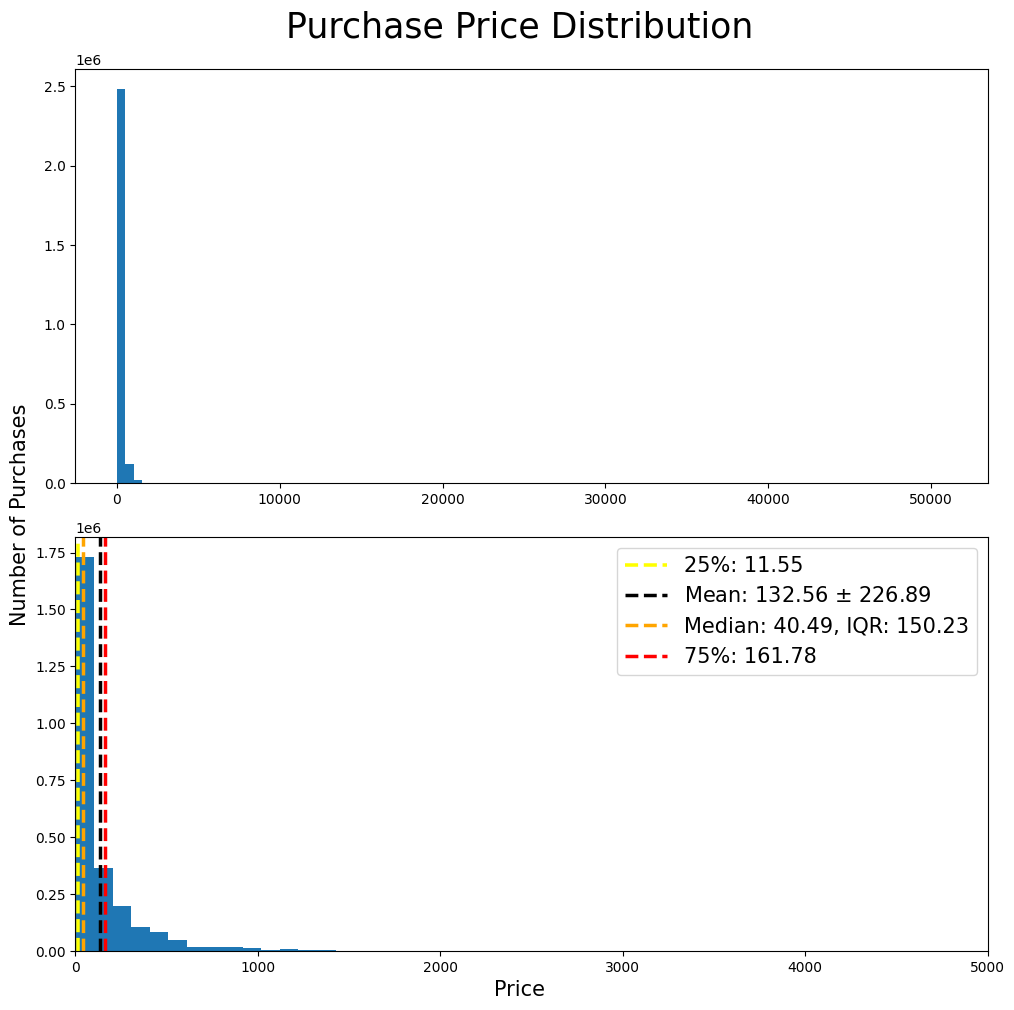

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2,1,figsize = (10,10))

axes[0].hist(x = estore_data.price, bins = 100)

axes[1].hist(x = estore_data.price, bins = 500)
axes[1].set_xlim(0,5000)

axes[1].axvline(np.percentile(estore_data.price, 25), color = 'yellow', linestyle = '--', linewidth = 2.55,
                label = f"25%: {np.percentile(estore_data.price, 25)}")

axes[1].axvline(np.mean(estore_data.price), color = 'black', linestyle = '--', linewidth = 2.5,
                label = f"Mean: {round(np.mean(estore_data.price), 2)} $\pm$ {round(np.std(estore_data.price), 2)}")

axes[1].axvline(np.median(estore_data.price), color = 'orange', linestyle = '--', linewidth = 2.5,
                label = f"Median: {np.median(estore_data.price)}, IQR: {np.percentile(estore_data.price, 75) - np.percentile(estore_data.price, 25)}")

axes[1].axvline(np.percentile(estore_data.price, 75), color = 'red', linestyle = '--', linewidth = 2.5,
                label = f"75%: {np.percentile(estore_data.price, 75)}")


fig.text(0.5, 0, 'Price', ha='center', va='center', fontsize = 15)
fig.text(0., 0.475, 'Number of Purchases', ha='center', va='center', rotation='vertical', fontsize = 15)
plt.suptitle('Purchase Price Distribution', fontsize = 25)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.show()

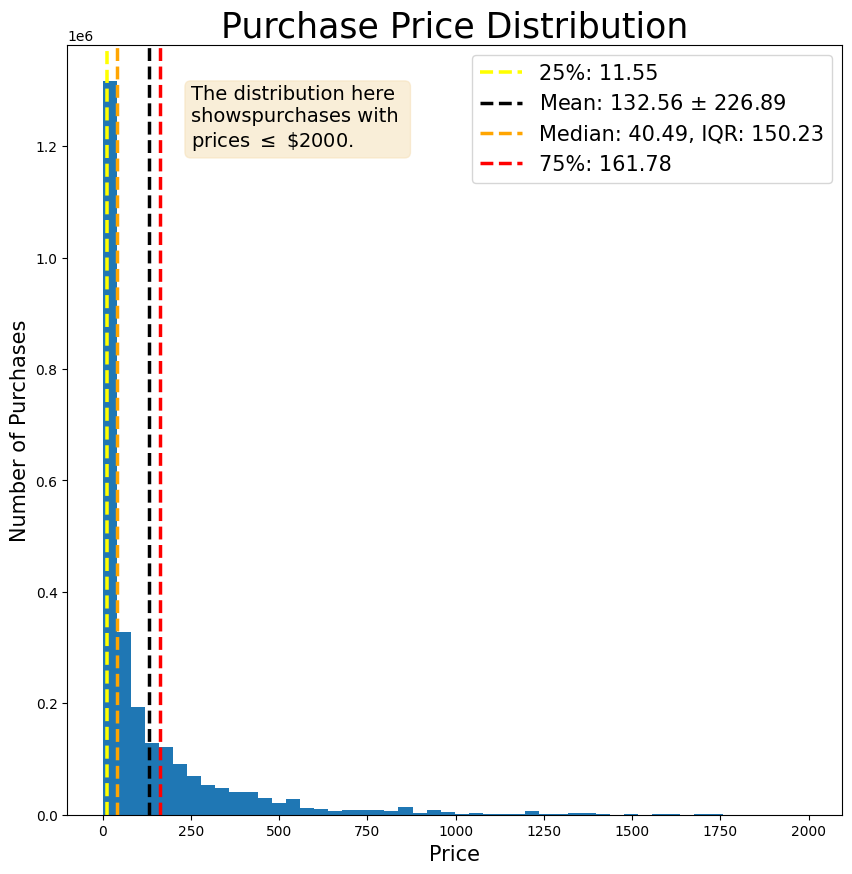

In [62]:
plt.figure(figsize = (10,10))

plt.hist(
    x = estore_data[estore_data.price <= 2000].price,
    bins = 50
)

plt.axvline(np.percentile(estore_data.price, 25), color = 'yellow', linestyle = '--', linewidth = 2.55,
                label = f"25%: {np.percentile(estore_data.price, 25)}")

plt.axvline(np.mean(estore_data.price), color = 'black', linestyle = '--', linewidth = 2.5,
                label = f"Mean: {round(np.mean(estore_data.price), 2)} $\pm$ {round(np.std(estore_data.price), 2)}")

plt.axvline(np.median(estore_data.price), color = 'orange', linestyle = '--', linewidth = 2.5,
                label = f"Median: {np.median(estore_data.price)}, IQR: {np.percentile(estore_data.price, 75) - np.percentile(estore_data.price, 25)}")

plt.axvline(np.percentile(estore_data.price, 75), color = 'red', linestyle = '--', linewidth = 2.5,
                label = f"75%: {np.percentile(estore_data.price, 75)}")

plt.title("Purchase Price Distribution", fontsize = 25)
plt.xlabel("Price", fontsize = 15)
plt.ylabel("Number of Purchases", fontsize = 15)
plt.text(250, 1200000, f"The distribution here \nshowspurchases with \nprices $\leq$ \$2000.",
         fontsize = 14, bbox = {"boxstyle": 'round', "color": 'wheat', "alpha": 0.5})
plt.legend(fontsize = 15)
plt.show()

In [63]:
estore_data.brand.nunique()

909

In [67]:
estore_data_brands = estore_data.brand.value_counts().index[:10]
estore_data_brands

Index(['unknown', 'samsung', 'ava', 'tefal', 'apple', 'huawei', 'lg',
       'philips', 'neo', 'polaris'],
      dtype='object')

In [68]:
brands_other = lambda brand: brand if brand in estore_data_brands else "other"

estore_data.brand = estore_data.brand.apply(brands_other)
estore_data.brand.unique()

array(['samsung', 'huawei', 'other', 'apple', 'lg', 'polaris', 'philips',
       'unknown', 'tefal', 'ava', 'neo'], dtype=object)

In [78]:
estore_data.brand.value_counts()

other      1209695
unknown     544624
samsung     358928
ava         118161
tefal        78653
apple        74709
huawei       57438
lg           55685
philips      52327
neo          42638
polaris      40663
Name: brand, dtype: int64

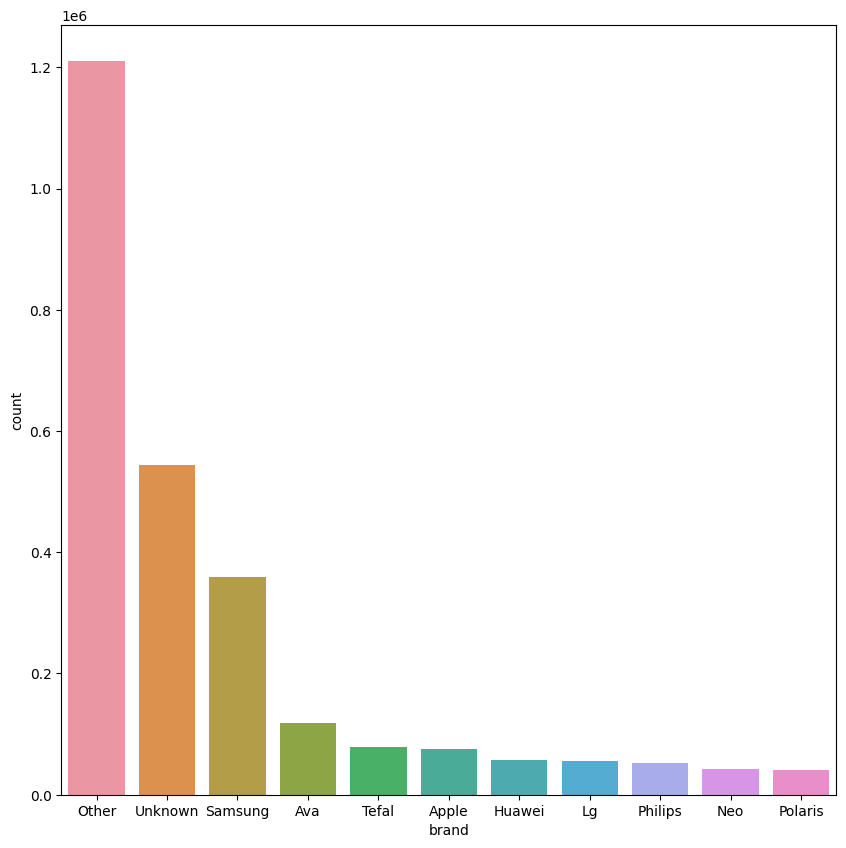

In [76]:
plt.figure(figsize = (10,10))

ax = sns.countplot(
    x = "brand",
    data = estore_data,
    order = estore_data.brand.value_counts().index
)
ax.set_xticklabels([brand.title() for brand in estore_data.brand.value_counts().index])
plt.show()